# Chapter 6: The Basics of Bar Charts
For additional context see Chapter 6 of [The Virus of Variation](https://www.brokenquality.com/book). Questions? Email James.Lehner@gmail.com or QualityIsBroken@gmail.com.

In [28]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from process_improvement import comparison_charts as cc
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get the data

This chapter uses two datasets. 

The first dataset is the death-to-birth rates by hospital (```death-to-birth-rates-by-hospital-1784-to-1849.csv)```. 

The second dataset is the causes of death in 1864 Dublin (```causes-of-death-in-1864-dublin.csv```). 

Both datasets can be found at https://github.com/jimlehner/the-virus-of-variation/tree/main/data.

### Get the death-to-birth rate data

In [29]:
# Establish the dataset_url
rate_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/death-to-birth-rates-by-hospital-1784-to-1849.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
rate_df = get_data(rate_url)

# Drop unnecessary columns
rate_df = rate_df.drop('Note', axis=1)

# Specify 'Year' column dtype as string
rate_df['Year'] = rate_df['Year'].astype('string')

# Show dataframe
rate_df.head()

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1784,284,6,2.1
1,Vienna General Hospital,1785,899,13,1.4
2,Vienna General Hospital,1786,1151,5,0.4
3,Vienna General Hospital,1787,1407,5,0.4
4,Vienna General Hospital,1788,1425,5,0.4


In [30]:
# Split dataframe according to hospital
vienna = rate_df[rate_df['Hospital'] == 'Vienna General Hospital']
dublin = rate_df[rate_df['Hospital'] == 'Dublin Maternity Hospital'].reset_index(drop=True)

### Get the causes of death data

In [31]:
# Establish dataset URL
deaths_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/causes-of-death-in-1864-dublin.csv'

# Get causes of death in Dublin dataset
causes_of_death_df = get_data(deaths_url)

# Make 'Cause of Death' column astype string
causes_of_death_df['Cause of Death'] = causes_of_death_df['Cause of Death'].astype('string')

# Drop 'Country' and 'City' columns
causes_of_death_df = causes_of_death_df.drop(['Country', 'City'], axis=1)

# Show dataframe
causes_of_death_df

,Cause of Death,Number of Deaths
0,Smallpox,25.18
1,Measles,15.00
2,Scarlatina,153.00
3,Diphtheria,43.00
4,Whooping Cough,82.00
5,Fever,394.00
6,Erysipelas,39.00
7,Childbed Fever,43.00
8,Childbirth,18.00
9,Influenza,27.00


## Table 6.1: Births and deaths by hospital in 1823

In [32]:
# Get data for only 1823
df_1823 = rate_df[rate_df['Year'] == '1823'].reset_index(drop=True)

# Show dataframe
df_1823

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1823,2872,214,7.5
1,Dublin Maternity Hospital,1823,2584,59,2.3


In [33]:
# Create Table 6.1
table_6_1 = df_1823[['Hospital', 'Births', 'Deaths']]

# Show dataframe
table_6_1

,Hospital,Births,Deaths
0,Vienna General Hospital,2872,214
1,Dublin Maternity Hospital,2584,59


## Figure 6.1: Bar chart of births and deaths by hospital in 1823

In [34]:
# Reshape df_1823 using melt
df_1823_melted = (
    df_1823.melt(id_vars='Hospital', 
                 var_name='Category', 
                 value_name='Count')
    .query("Count != '1823' and Category != 'Rate'")
)

# Show new dataframe
df_1823_melted

,Hospital,Category,Count
2,Vienna General Hospital,Births,2872
3,Dublin Maternity Hospital,Births,2584
4,Vienna General Hospital,Deaths,214
5,Dublin Maternity Hospital,Deaths,59


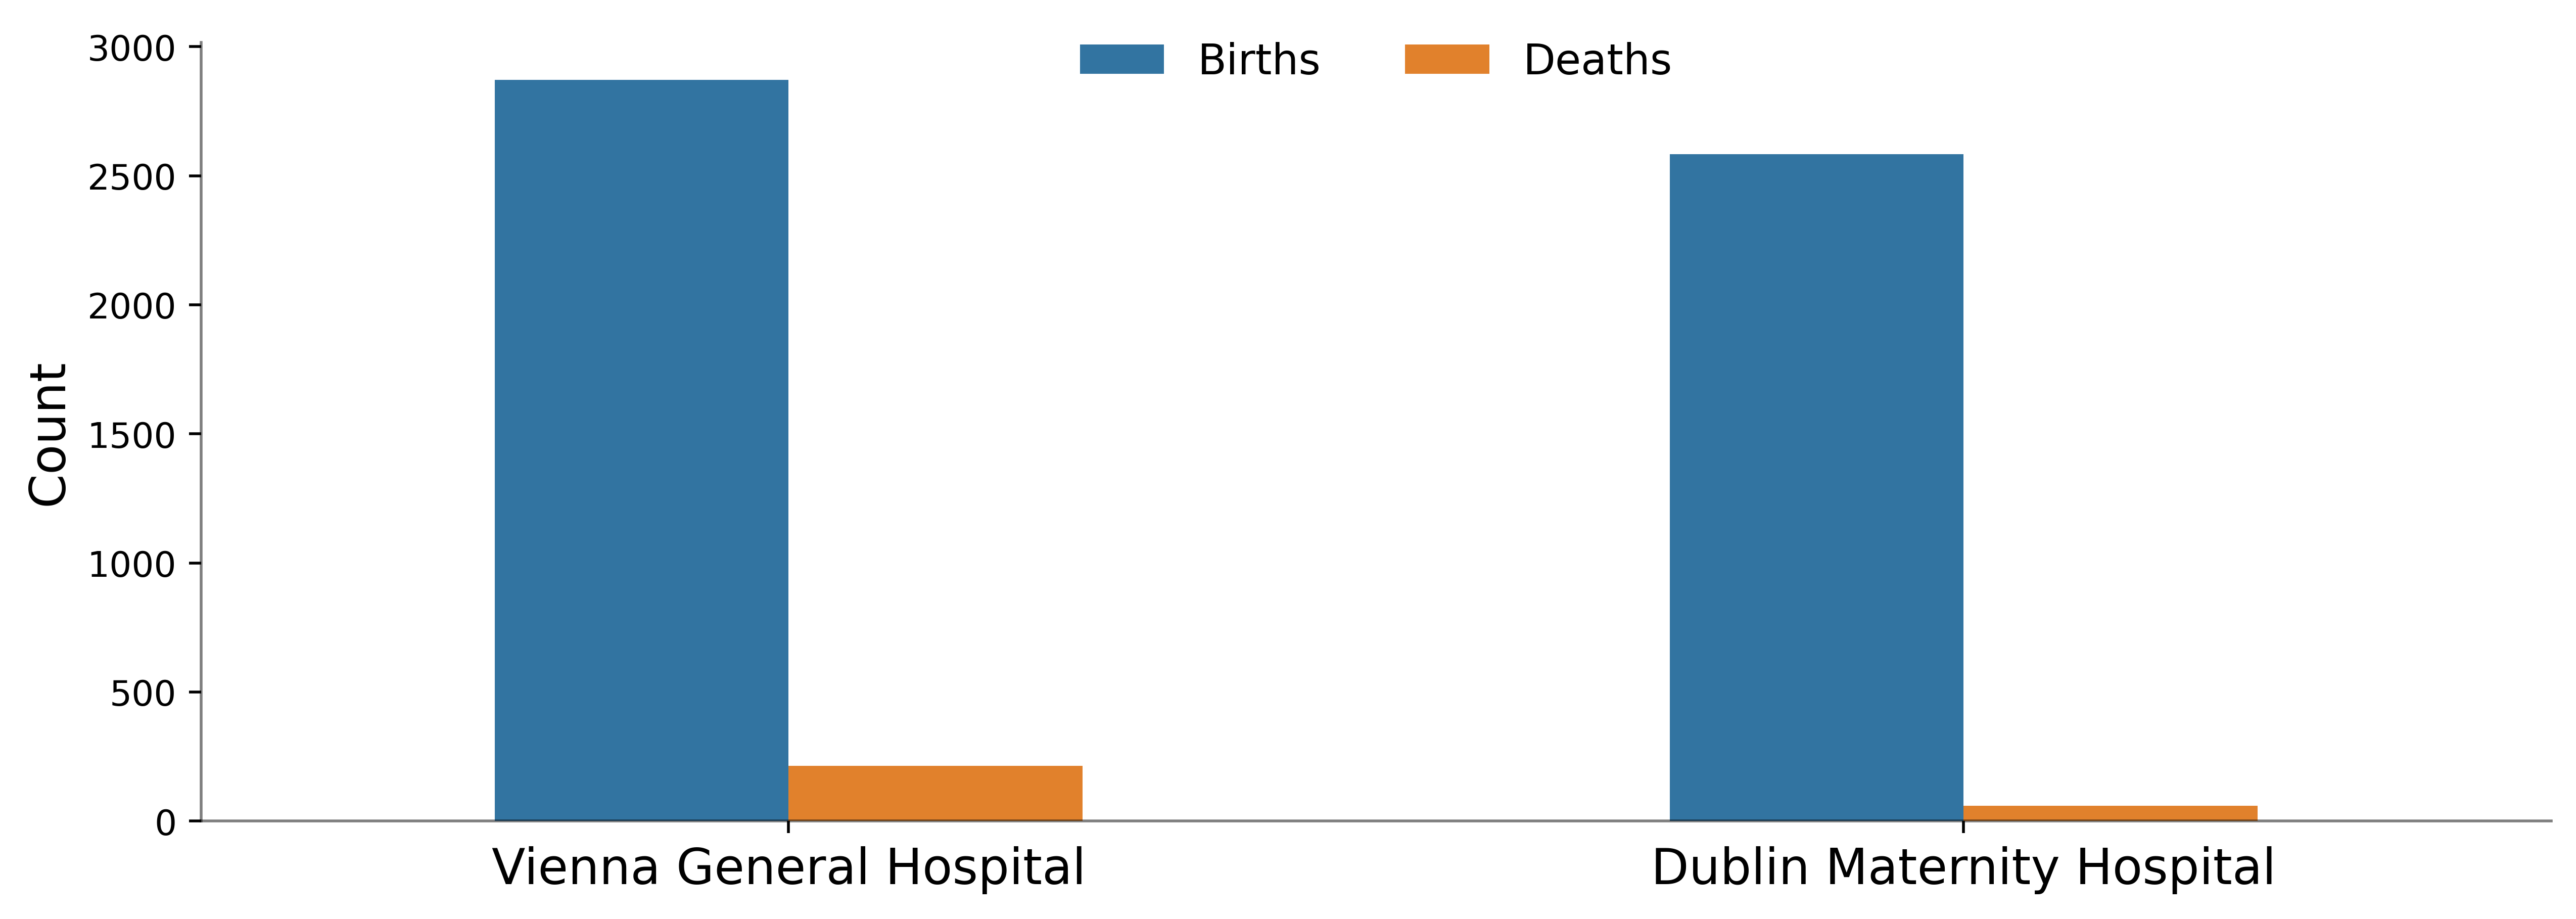

In [35]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot the data in the bar chart
barplot = sns.barplot(data=df_1823_melted[:4], 
                      x='Hospital', 
                      y='Count', 
                      hue='Category',
                      palette=['tab:blue','tab:orange'],
                      ax=ax, 
                      width=0.5)

# Remove the legend title
legend = ax.legend_  # Access the legend object
legend.set_title("")  

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 

# Customize the legend
ax.legend(
    title="",        
    loc="upper center",   
    bbox_to_anchor=(0.5, 1.05), 
    ncol=2,
    fontsize=12,       
    frameon=False
)

# Despine figure
sns.despine()
# Set spine alpha
ax.spines[['left','bottom']].set_alpha(0.5)
# Additional formatting
ax.set_xlabel('')
ax.set_ylabel('Count', fontsize=14)

# Show plot
plt.show()

## Figure 6.2: Bar chart of births and deaths by hospital in 1823, with a fixed vertical scale

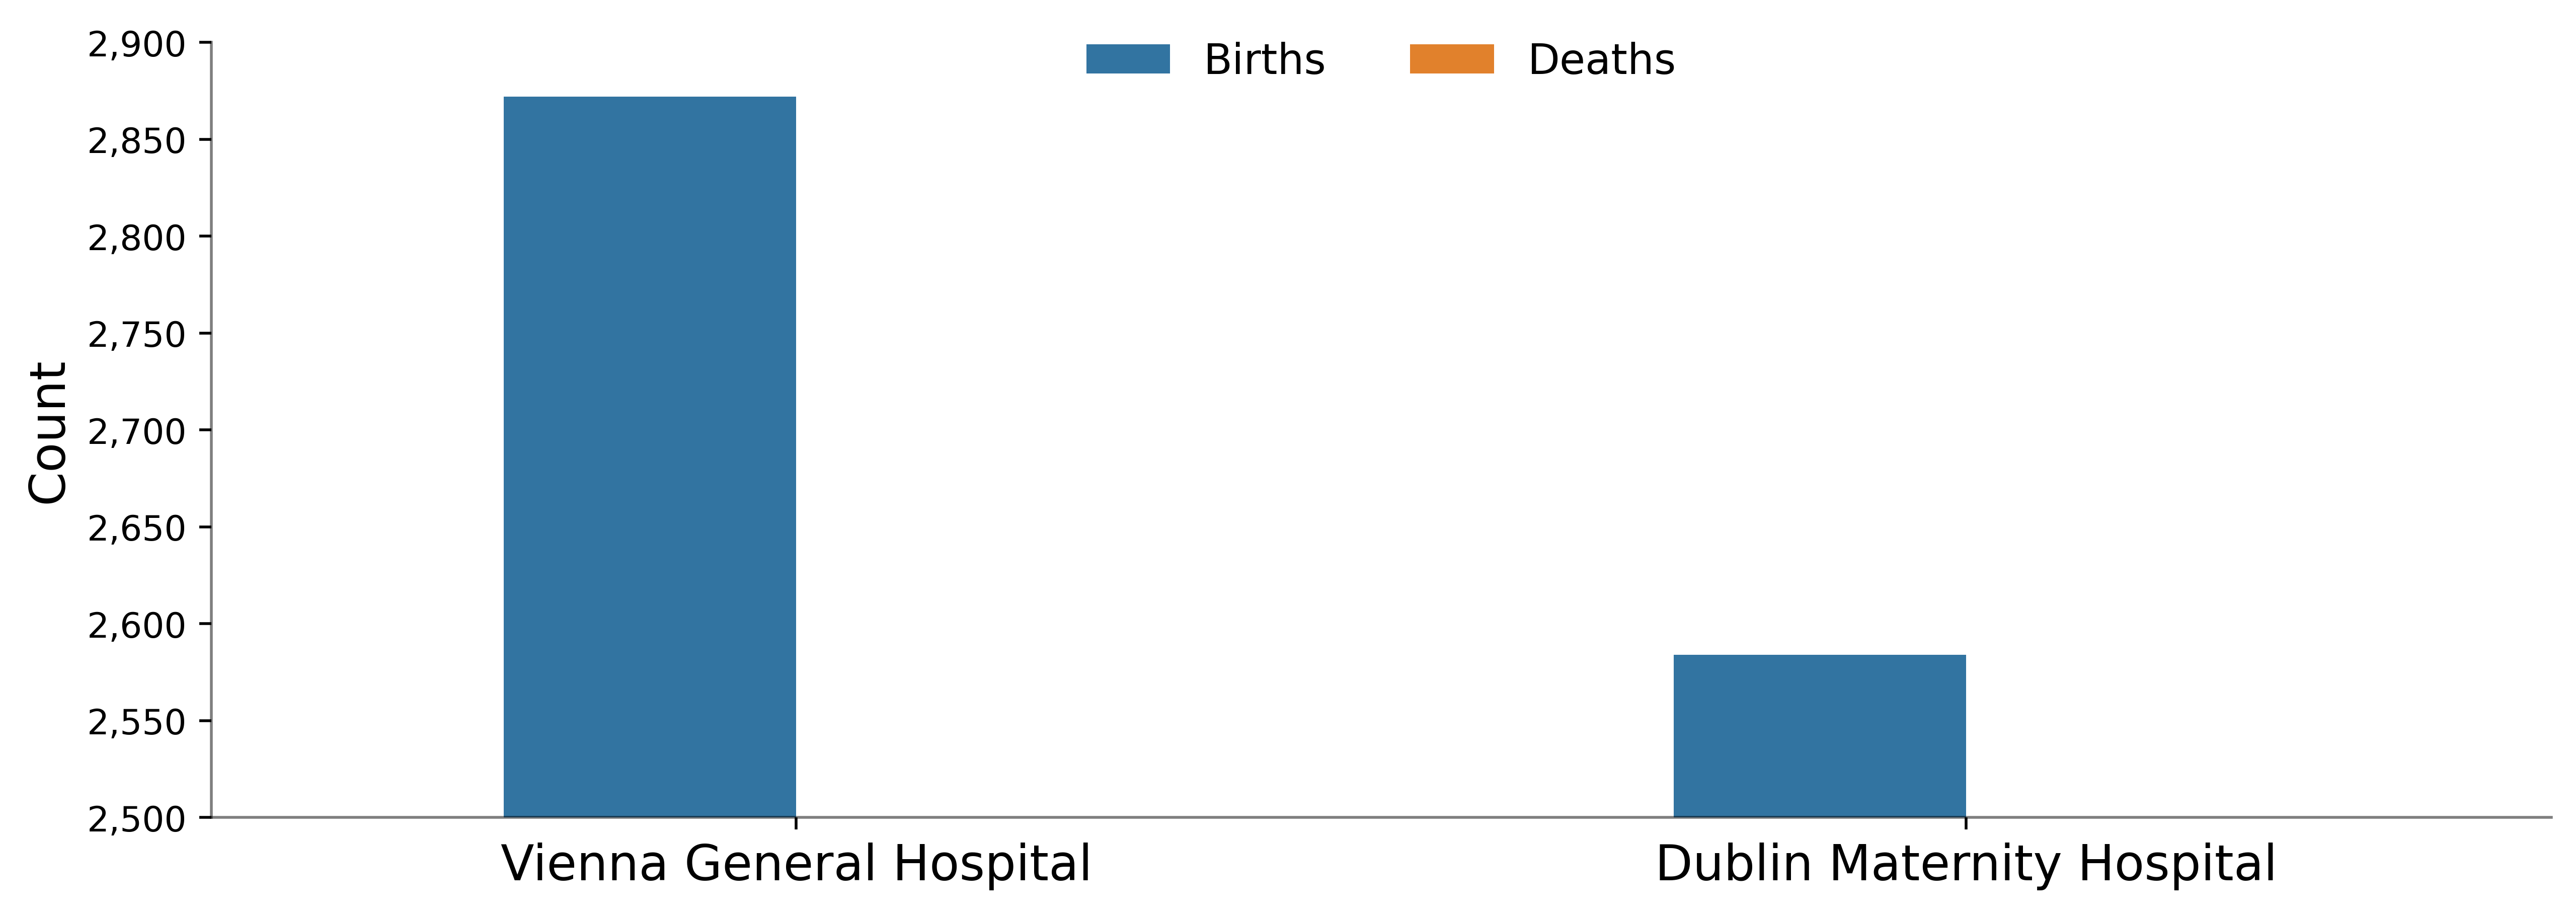

In [36]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(data=df_1823_melted[:4], 
                      x='Hospital', 
                      y='Count', 
                      hue='Category',
                      palette=['tab:blue','tab:orange'],
                      ax=ax,
                      width=0.5)

ax.set_xlabel('')
sns.despine()

# Remove the legend title
legend = ax.legend_  # Access the legend object
legend.set_title("")  # Remove the 'Category' title

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 

# Customize the legend
ax.legend(
    title="",        # Remove the legend title
    loc="upper center",   # Place the legend at the top center
    bbox_to_anchor=(0.5, 1.05),  # Adjust the placement to center it
    ncol=2,           # Place the legend items in 2 columns (horizontal layout)
    fontsize=12,       # Optional: Adjust the legend font size
    frameon=False
)

# Limit y-axis
ax.set_ylim(2500,2900)
ax.spines[['left','bottom']].set_alpha(0.5)
ax.set_ylabel('Count', fontsize=14)

# Add commas to y-axis tick labels >= 1000
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

# Show plot
plt.show()

## Figure 6.3: Stacked bar chart of births and deaths by hospital in 1823

In [37]:
df_1823

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1823,2872,214,7.5
1,Dublin Maternity Hospital,1823,2584,59,2.3


In [38]:
# Force pandas to explicit dtype behavior when filling missing values (for .fillna(0))
pd.set_option('future.no_silent_downcasting', True)

# Stack data using pivot
df_pivot = (df_1823_melted.pivot(index="Hospital", 
                                 columns="Category", 
                                 values="Count").fillna(0)
            .loc[['Vienna General Hospital', 'Dublin Maternity Hospital']])


df_subset = df_pivot[['Births','Deaths']]
df_subset

Category,Births,Deaths
Hospital,,
Vienna General Hospital,2872,214
Dublin Maternity Hospital,2584,59


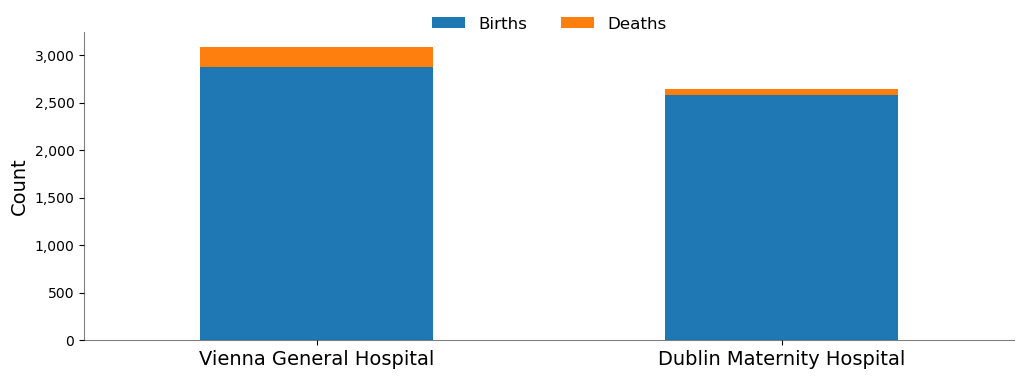

In [39]:
# Plot a stacked bar chart
ax = df_subset.plot(kind='bar', 
                   stacked=True, 
                   figsize=(12, 4), 
                   color=['tab:blue', 'tab:orange'])

# Set labels and title
plt.xlabel('')
plt.ylabel('Count')
# plt.title('Births and deaths by hospital in 1823', fontsize=16, y=1.10)

# Customize the legend
plt.legend(
    title="",        # Remove the legend title
    loc="upper center",   # Place the legend at the top center
    bbox_to_anchor=(0.5, 1.10),  # Adjust the placement to center it
    ncol=2,           # Place the legend items in 2 columns (horizontal layout)
    fontsize=12,       # Optional: Adjust the legend font size
    frameon=False
)

# Despine
sns.despine()
# Set alphas
ax.spines[['left','bottom']].set_alpha(0.5)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14)

# Rotate the x-tick labels
plt.xticks(rotation=0)
ax.set_ylabel('Count', fontsize=14)

# Add commas to y-axis tick labels >= 1000
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

# Display the plot
plt.show()

## Table 6.2: Counts and the assocaited percentage of deaths by hospital in 1823

In [40]:
# Sub-select columns from df_1823
table_6_2 = (df_1823[['Hospital','Deaths']]).copy()

# Generate 'Percent' column
table_6_2['Percent'] = round((table_6_2['Deaths']/table_6_2['Deaths'].sum())*100)

# Show dataframe
table_6_2

,Hospital,Deaths,Percent
0,Vienna General Hospital,214,78.0
1,Dublin Maternity Hospital,59,22.0


## Figure 6.4: Pie chart of the distribution of deaths by hospital in 1823

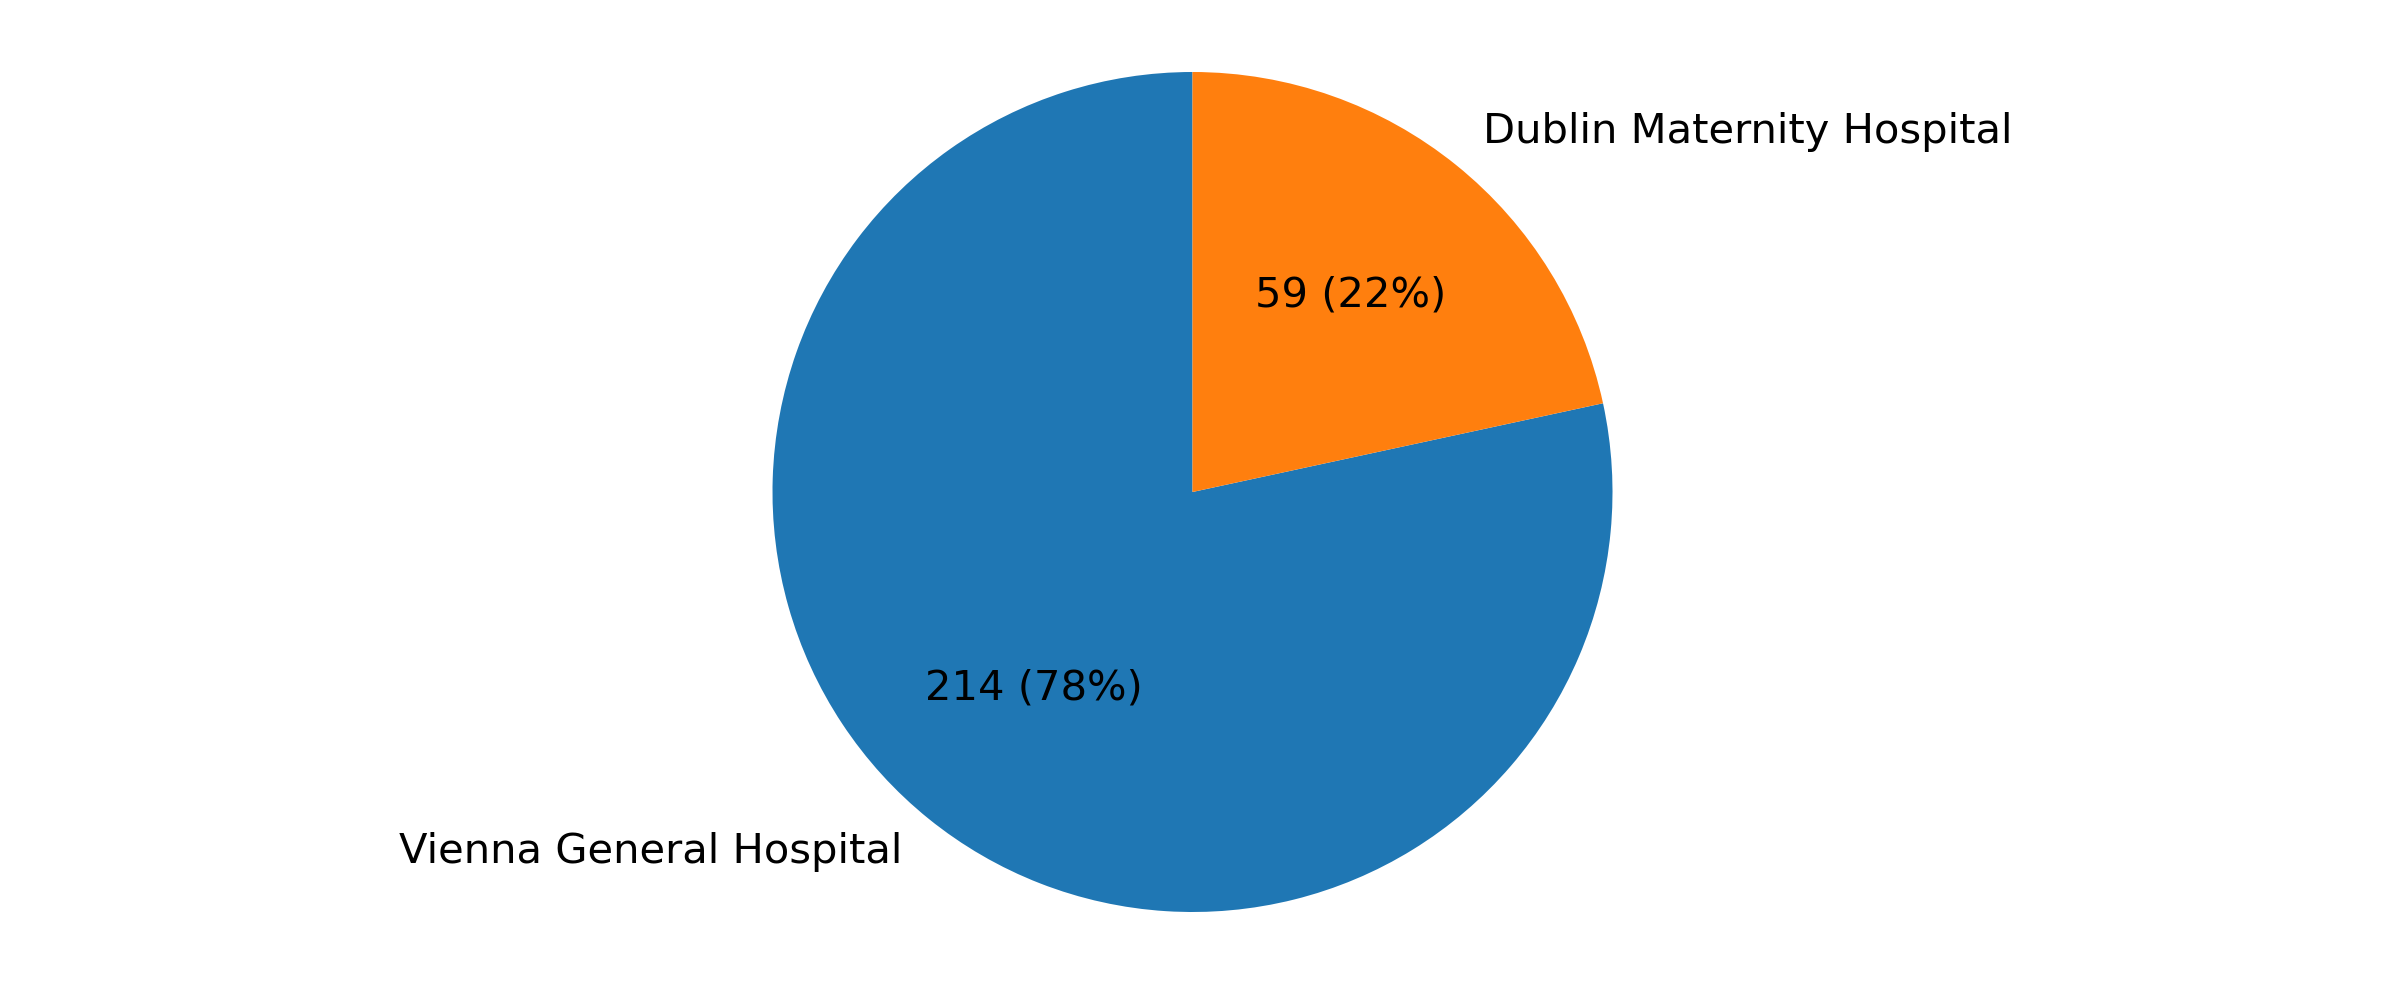

In [41]:
# Create size and labels objects
sizes = table_6_2['Deaths']
labels = table_6_2['Hospital']
# Specify colors for pie chart
colors = ['tab:blue', 'tab:orange']

# Function to format the pie chart with both count and percentage
def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))
    return f"{absolute} ({pct:.0f}%)"

# Plot the pie chart
plt.figure(figsize=(10, 4), dpi=300)
plt.pie(sizes, 
        labels=labels, 
        autopct=lambda pct: func(pct, sizes), 
        startangle=90, 
        colors=colors, 
        radius=0.5)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')  

# Show pie chart
plt.show()

## Figure 6.5: Bar chart of the distribution of deaths by hospital in 1823

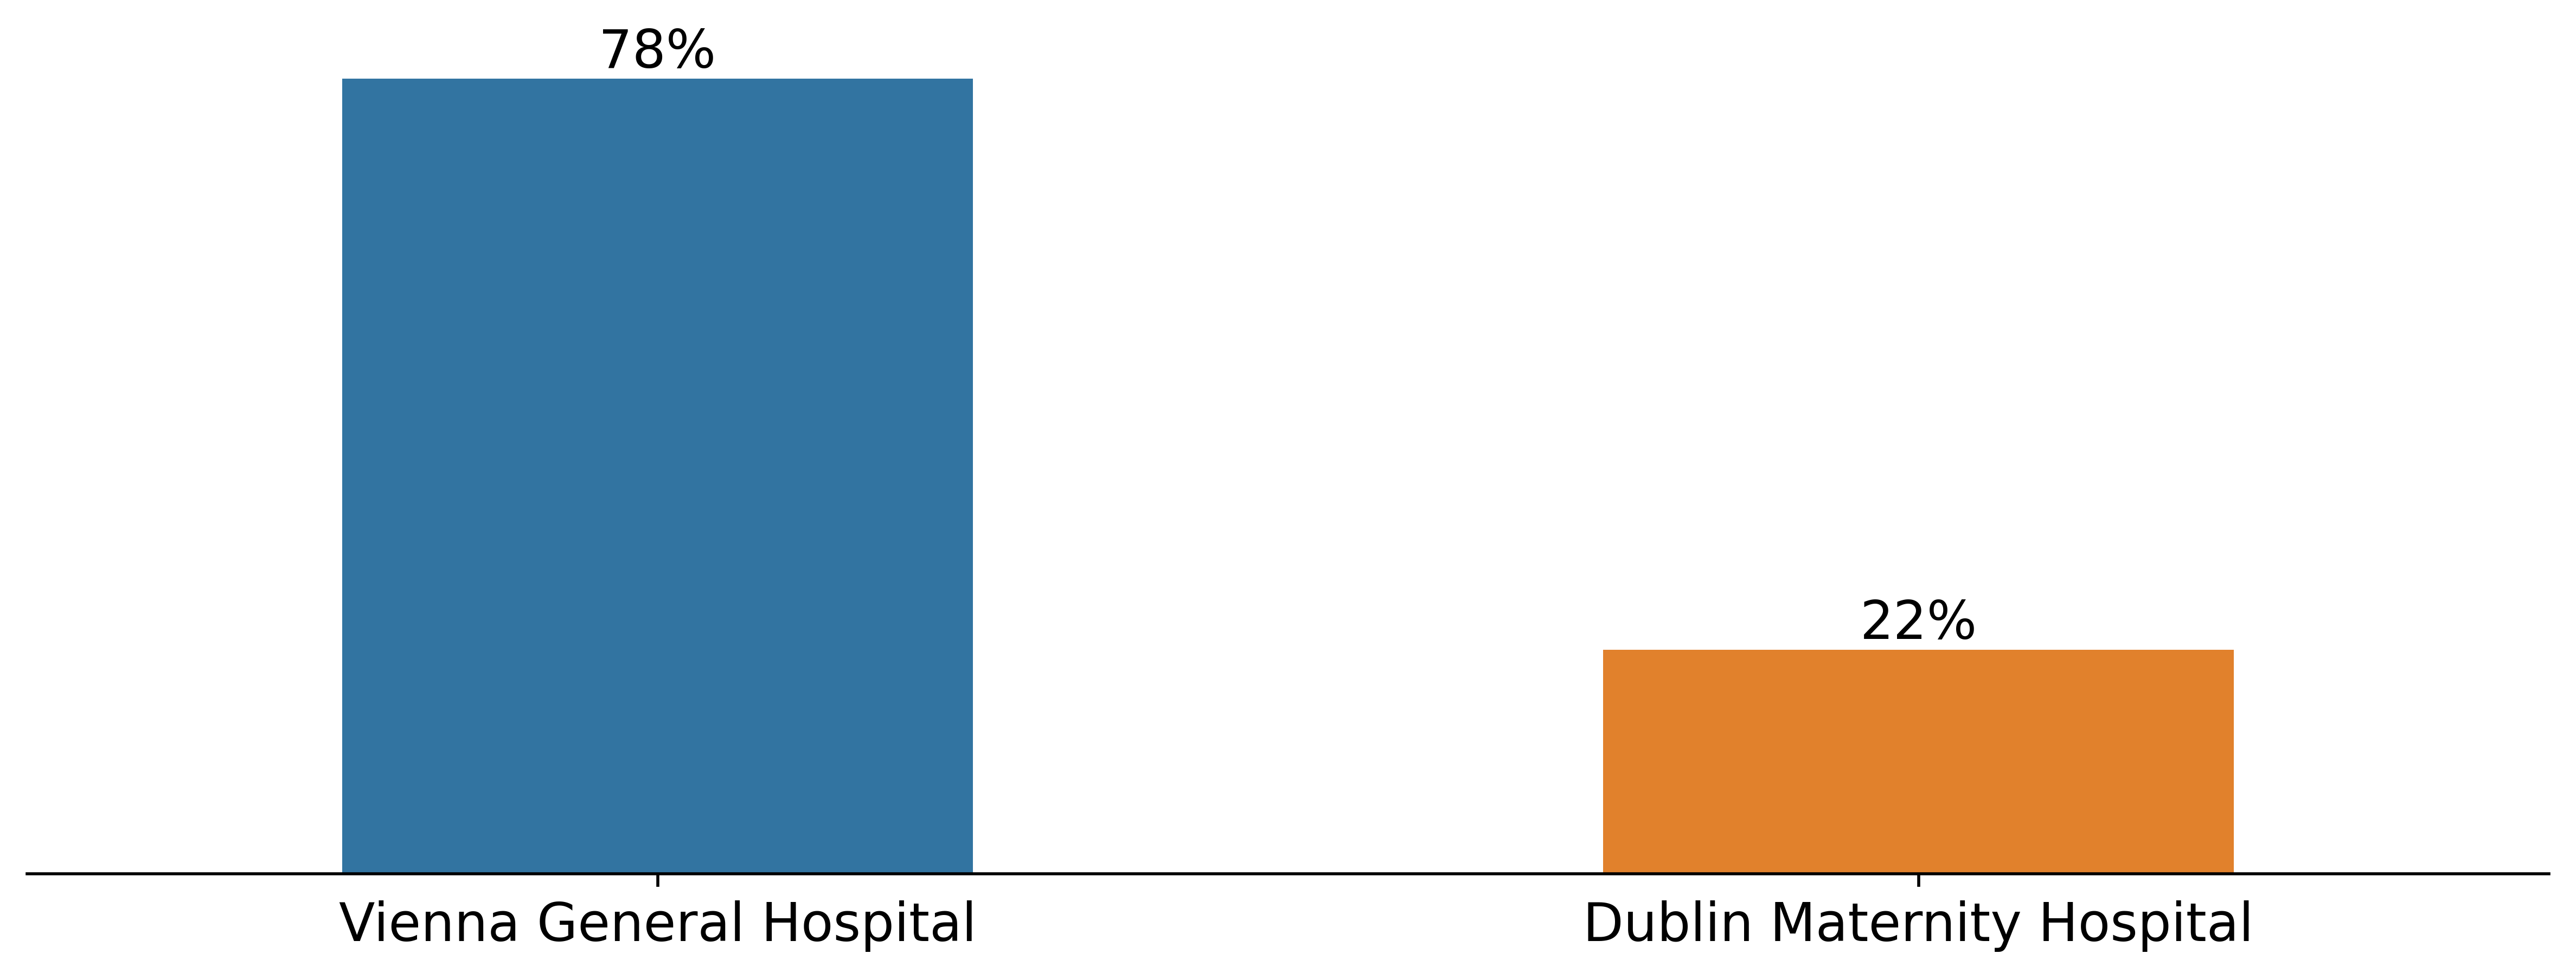

In [52]:
# Data for the pie chart
labels = pd.Series(
    ['Vienna General Hospital', 
     'Dublin Maternity Hospital']
)
sizes = table_6_2['Deaths']
percents = table_6_2['Percent']
colors = ['tab:blue', 'tab:orange']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(x=labels, 
                      y=percents,
                      palette=colors,
                      ax=ax,
                      width=0.5) 

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.0f}%',  # Format the label as an integer
            ha='center', va='bottom', fontsize=14, color='black'
        )

# Additional formatting
ax.set_yticks([])
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=14)
sns.despine(left=True)

# Show plot
plt.show()

## Table 6.3: Births by hospital in 1823 and 1824 as well as the percentage change

In [43]:
# Calculate percent change for Vienna General births
vienna_births = (
    vienna[vienna['Year'].isin(['1823', '1824'])][['Hospital', 'Year', 'Births']]
    .reset_index(drop=True)
    .assign(**{"Percent Change": lambda df: df['Births'].pct_change()
               .mul(100).round(1)})
                )

# Show resulting dataframe
vienna_births

,Hospital,Year,Births,Percent Change
0,Vienna General Hospital,1823,2872,NaN
1,Vienna General Hospital,1824,2911,1.4


In [44]:
# Calculate percent change for Dublin Maternity births
dublin_births = (
    dublin[dublin['Year'].isin(['1823','1824'])][['Hospital','Year','Births']]
    .reset_index(drop=True)
    .assign(**{"Percent Change": lambda df: df['Births'].pct_change()
               .mul(100).round(1)})
                )
# Show resulting dataframe
dublin_births

,Hospital,Year,Births,Percent Change
0,Dublin Maternity Hospital,1823,2584,NaN
1,Dublin Maternity Hospital,1824,2446,-5.3


In [45]:
# Combine the Vienna births dataframe and Dublin births dataframe
df_percent_change = pd.concat([vienna_births[['Hospital', 'Percent Change']], 
                             dublin_births[['Hospital', 'Percent Change']]], 
                            ignore_index=True).dropna()

# Show dataframe
df_percent_change

,Hospital,Percent Change
1,Vienna General Hospital,1.4
3,Dublin Maternity Hospital,-5.3


In [46]:
# Create dataframe of births in 1823 and 1824 by hospital and year
df_1823_1824_births = rate_df.loc[
    (rate_df['Year'] == '1823') | (rate_df['Year'] == '1824'),
    ['Hospital', 'Year', 'Births']
]

# Pivot dataframe so years become columns
df_pivot = df_1823_1824_births.pivot(index='Hospital', columns='Year', values='Births').reset_index()

# Remove the 'Year' title from the index
df_pivot.columns.name = None

# Show dataframe
df_pivot

,Hospital,1823,1824
0,Dublin Maternity Hospital,2584,2446
1,Vienna General Hospital,2872,2911


In [47]:
# Create table 6.3
table_6_3 = pd.merge(df_pivot, df_percent_change, on='Hospital').sort_values(by='Percent Change', ascending=False)

# Show dataframe
table_6_3

,Hospital,1823,1824,Percent Change
1,Vienna General Hospital,2872,2911,1.4
0,Dublin Maternity Hospital,2584,2446,-5.3


## Figure 6.6: Deviation chart of births in 1824 relative to births in 1823 by hospital

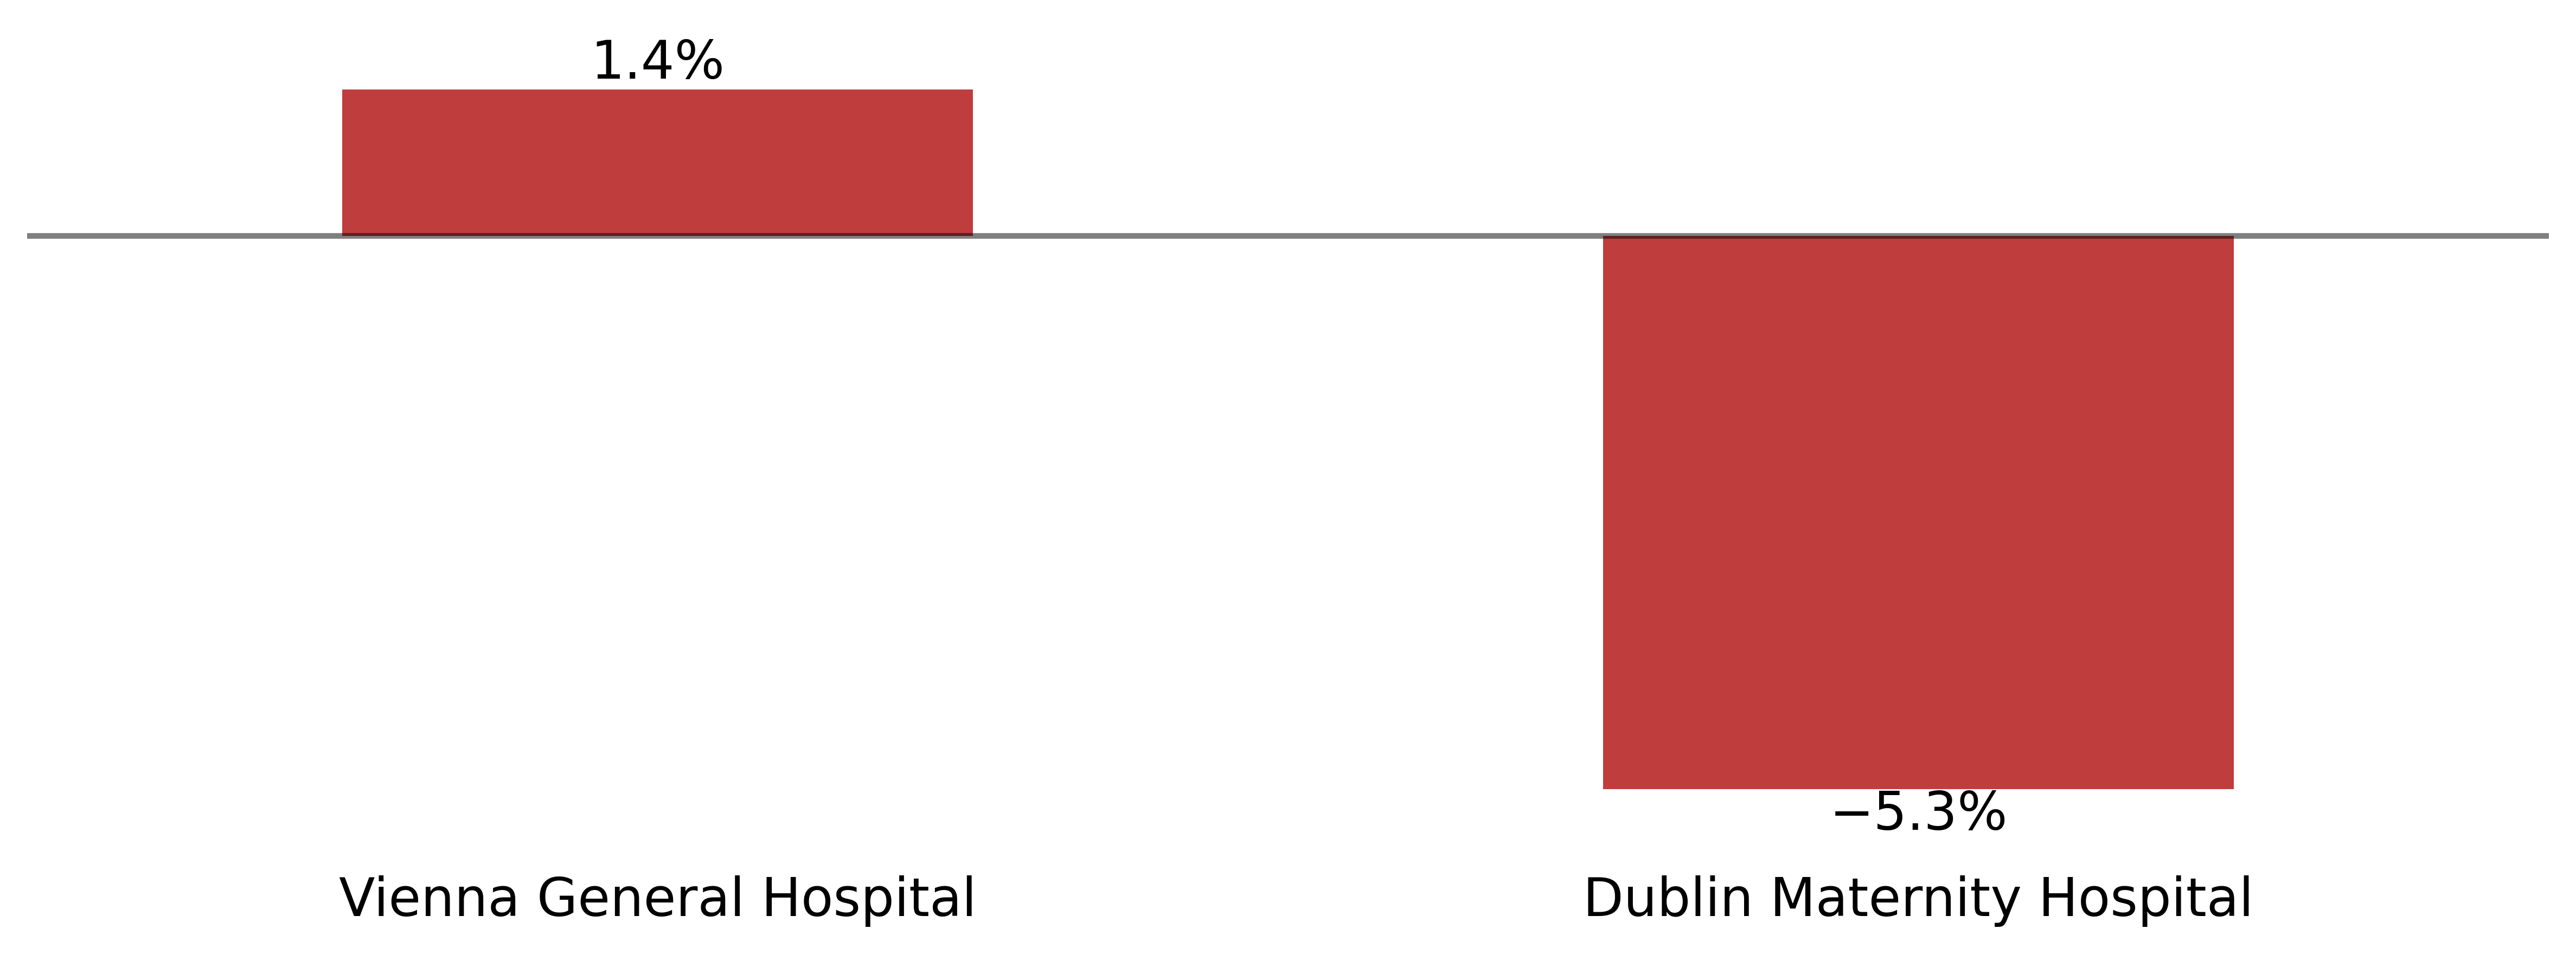

In [48]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(data=table_6_3, 
                      x='Hospital', 
                      y='Percent Change', 
                      ax=ax,
                      width=0.5,
                      color='tab:red') 

# Fix y-axis limits
ax.set_ylim(-6,2)

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.1f}%',  # Format the label as an integer
            ha='center', va='bottom', fontsize=14, color='black')
    elif height < 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height, 
            f'\u2212{abs(height):.1f}%',  # Use the unicode minus sign instead of a hyphen 
            ha='center', va='top', fontsize=14, color='black'
        )
    

# Add horizontal line at zero 
ax.axhline(c='black', alpha=0.5)

# Other formating
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', 
               which='both', 
               length=0, 
               labelsize=14)

# Despine figure
sns.despine(left=True, bottom=True)

# Show plot
plt.show()

## Figure 6.7: Pareto chart of causes of death in 1864 Dublin

In [49]:
# Sort causes of death dataframe by 'Number of Deaths' column
# Calculate values for cumulative percentage curve
causes_of_death_df = (causes_of_death_df.sort_values(by='Number of Deaths', 
                                                     ascending=False)
                      .reset_index(drop=True)
                      .assign(**{"Cumulative Percentage": lambda df: round(df['Number of Deaths']
                                                                           .cumsum() / df['Number of Deaths']
                                                                           .sum() * 100, 1)})
                     )
# Show results
causes_of_death_df

,Cause of Death,Number of Deaths,Cumulative Percentage
0,Respiratory,1582.00,41.0
1,Consumption,974.00,66.2
2,Fever,394.00,76.4
3,Diarrhea,213.00,81.9
4,Violence,194.00,86.9
5,Scarlatina,153.00,90.9
6,Whooping Cough,82.00,93.0
7,Dysentery,47.00,94.2
8,Diphtheria,43.00,95.4
9,Childbed Fever,43.00,96.5


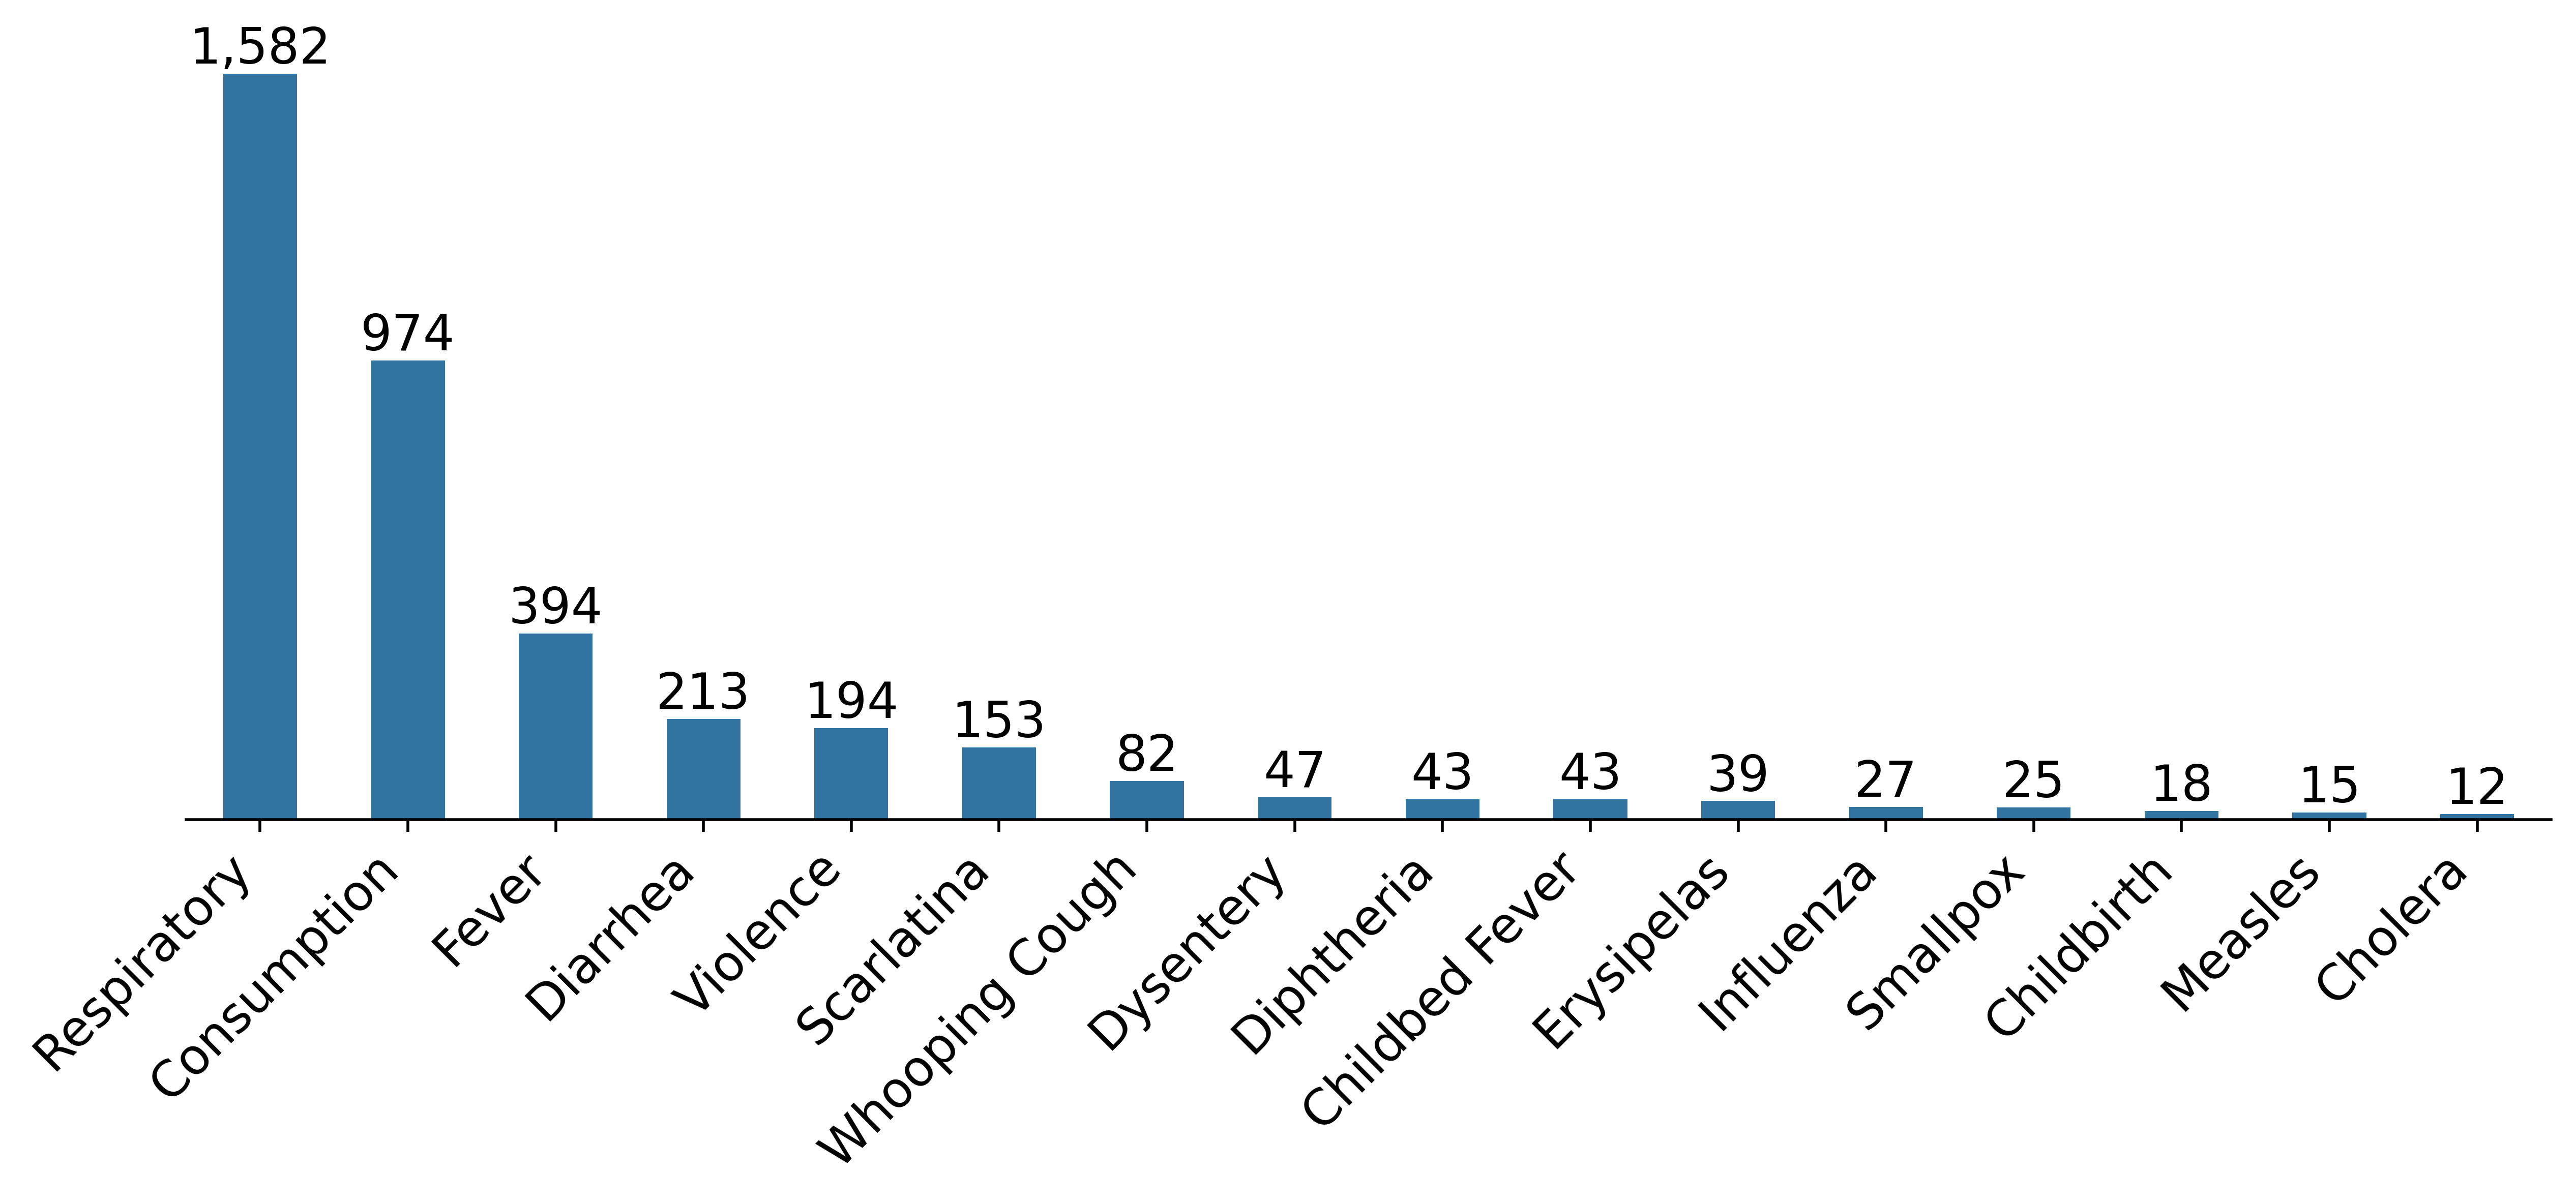

In [50]:
# Create fig and ax
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Create barplot object
barplot = sns.barplot(data=causes_of_death_df, 
                      x='Cause of Death', 
                      y='Number of Deaths',  
                      color='tab:blue',
                      ax=ax, 
                      width=0.5)

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        label = f'{int(height):,}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            label,
            ha='center', va='bottom', fontsize=14, color='black'
        )

# Specify title and format
# ax.set_title("Number of deaths by cause in 1864 Dublin", fontsize=16, y=1.10)

# Remove axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])

# Despine figure
sns.despine(left=True)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 

# Rotate xtick labels
plt.xticks(rotation=45, ha='right', va='top')

# Show the plot
plt.show()

## Figure 6.8: Parteo chart of causes of death in 1864 Dublin, with cumulative percentage curve

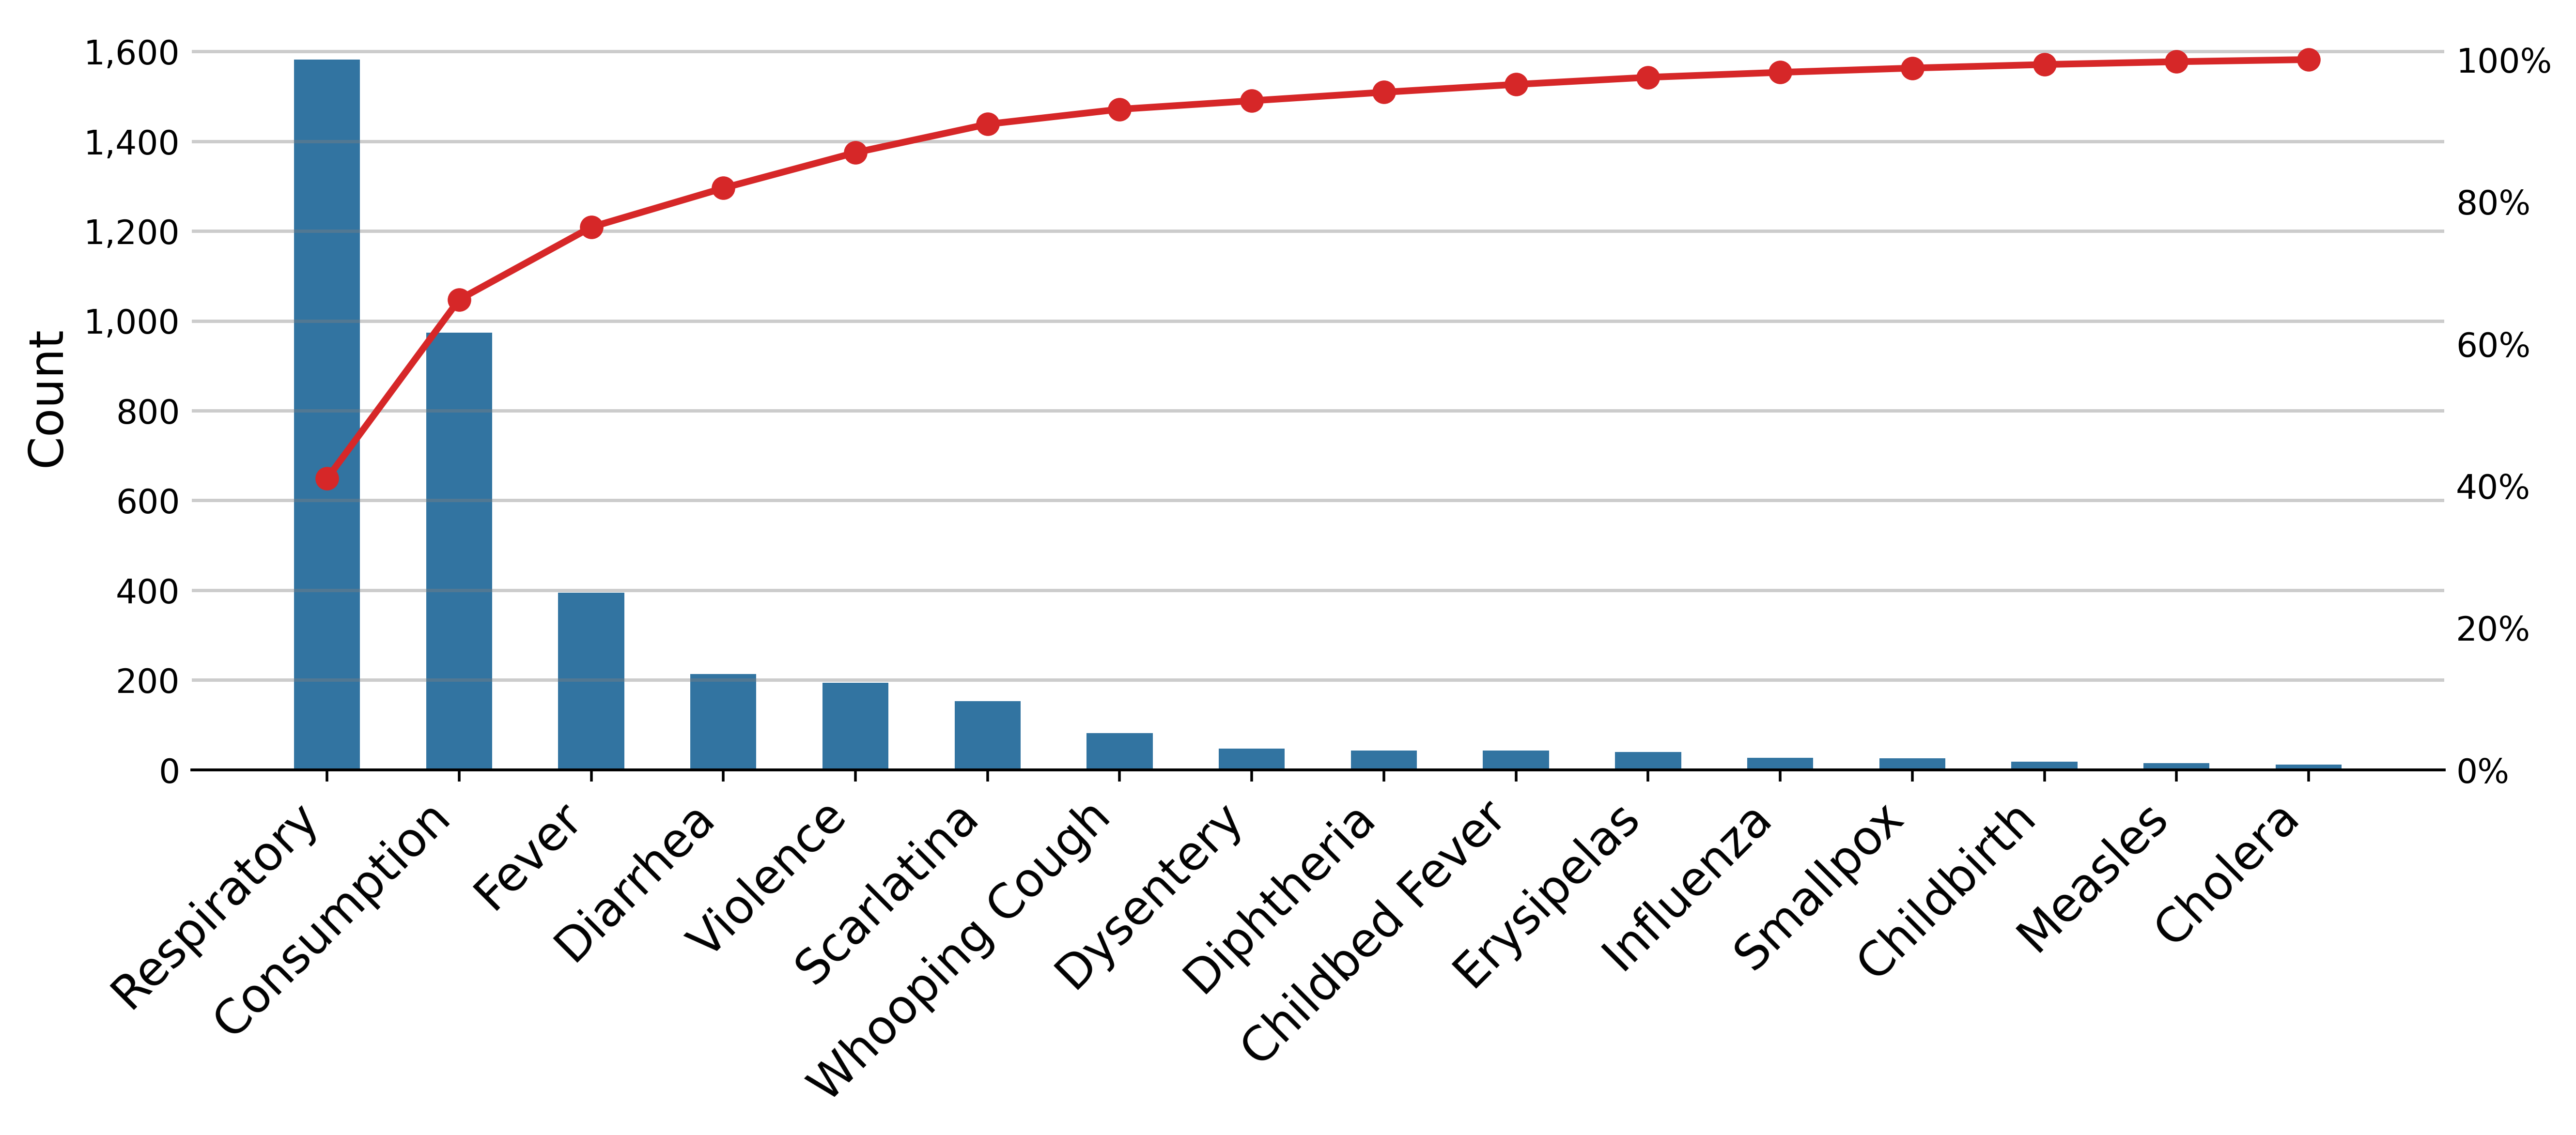

In [51]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Bar plot (first plot the bars)
barplot = sns.barplot(data=causes_of_death_df, 
                      x='Cause of Death', 
                      y='Number of Deaths',  
                      color='tab:blue',
                      ax=ax, 
                      width=0.5)

# Plot the cumulative percentage curve (draw after bars)
ax2 = ax.twinx()  # Create a second y-axis for the curve
ax2.set_ylim(0, 105)
ax2.plot(causes_of_death_df['Cause of Death'], causes_of_death_df['Cumulative Percentage'], 
         color='tab:red', marker='o', linestyle='-', linewidth=2, zorder=5)  # Lower zorder

# Remove x-tick labels for ax2
ax2.set_xticks([])  # Removes the x-tick labels on the secondary axis (ax2)
ax.tick_params(axis='y', length=0)
ax2.tick_params(axis='y', length=0)

# Add gridlines to ax2 (secondary axis)
ax.grid(True, axis='y', linestyle='-', linewidth=1, color='gray', alpha=0.4)  # Modify alpha for faint gridlines

# Remove x and y labels
ax.set_xlabel('')
ax.set_ylabel('')

# Despine the plot
sns.despine(left=True)

# Set y label
ax.set_ylabel('Count', fontsize=14)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14, rotation=45)

# Explicitly set x-ticks positions
ax.set_xticks(range(len(causes_of_death_df)))

# Align xtick labels to the right
ax.set_xticklabels(causes_of_death_df['Cause of Death'], rotation=45, ha='right')

# Add commas to y-axis tick labels >= 1000
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

# Format the secondary y-axis ticks to show percentages
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))

# Show the plot
plt.show()